In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud


In [4]:
users_items_df = pd.read_csv('C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/users_items_exportado.csv')
users_items_df

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10.0,Counter-Strike,6.0,0.0
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,20.0,Team Fortress Classic,0.0,0.0
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,30.0,Day of Defeat,7.0,0.0
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40.0,Deathmatch Classic,0.0,0.0
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,50.0,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,202090.0,Magicka: Wizard Wars,1501.0,0.0
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,239220.0,The Mighty Quest For Epic Loot,2374.0,0.0
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,257730.0,Infinity Wars - Animated Trading Card Game,654.0,0.0
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,227220.0,Sang-Froid - Tales of Werewolves,2973.0,0.0


In [5]:
#Información general
users_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  int64  
 2   steam_id          88310 non-null  int64  
 3   user_url          88310 non-null  object 
 4   item_id           88176 non-null  float64
 5   item_name         88176 non-null  object 
 6   playtime_forever  88176 non-null  float64
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.4+ MB


In [6]:
#Estadistica descriptiva de variables númericas
users_items_df.describe()

,items_count,steam_id,item_id,playtime_forever,playtime_2weeks
count,88310.000000,8.831000e+04,88176.000000,88176.000000,88176.00000
mean,58.353629,7.656120e+16,188589.987763,1334.142340,23.79931
std,122.312095,3.931726e+07,133282.962591,7054.061431,267.57286
min,0.000000,7.656120e+16,10.000000,0.000000,0.00000
25%,3.000000,7.656120e+16,40800.000000,0.000000,0.00000
50%,26.000000,7.656120e+16,219740.000000,52.000000,0.00000
75%,73.000000,7.656120e+16,282140.000000,458.000000,0.00000
max,7762.000000,7.656120e+16,527810.000000,400827.000000,18126.00000


In [7]:
#Estadistica descriptiva de variables categoricas
columnas_object_items = users_items_df.select_dtypes(include=['object']).columns
df_items = users_items_df[columnas_object_items]
df_items.describe()

,user_id,user_url,item_name
count,88310,88310,88176
unique,87626,87626,5382
top,X03-Suits,http://steamcommunity.com/id/X03-Suits,Counter-Strike: Global Offensive
freq,3,3,700


In [8]:
#analisamos la cantidad de valores unicos
users_items_df['item_name'].nunique()

5382

In [9]:
#contamos los 'item_name' por nombre de juego
users_items_df['item_name'].value_counts()

item_name
Counter-Strike: Global Offensive    700
Garry's Mod                         654
Dota 2 Test                         643
Unturned                            610
Left 4 Dead 2 Beta                  532
                                   ... 
Hero of Many                          1
The Old City: Leviathan               1
Olympia Rising                        1
The Floor is Jelly                    1
Winged Sakura: Mindy's Arc            1
Name: count, Length: 5382, dtype: int64

In [11]:
#analisamos los juegadores con mas horas jugadas
user_time = users_items_df.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

In [12]:
#y seleccionamos a los 5 jugadores con mas horas jugadas
user_time = user_time.head(5)

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_21444\2607203716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_time.index, y=user_time.values, palette='coolwarm')


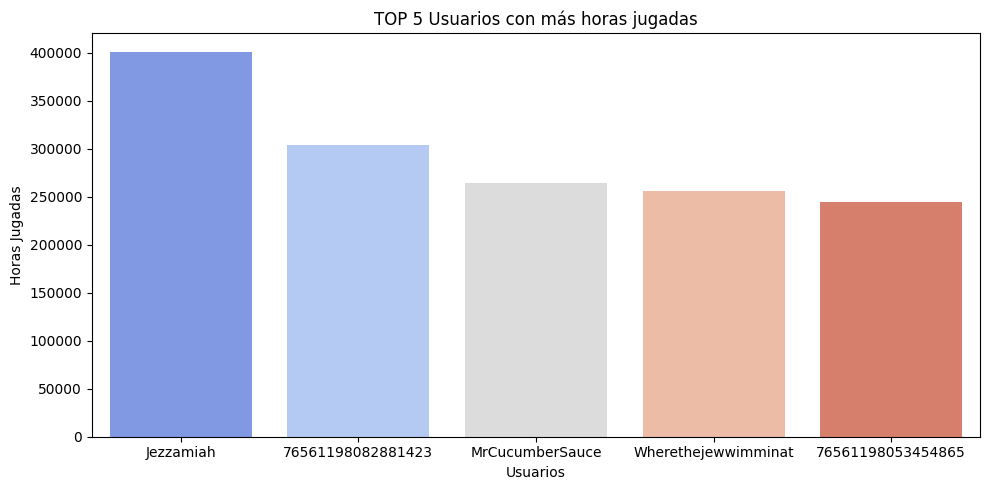

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=user_time.index, y=user_time.values, palette='coolwarm')
plt.title('TOP 5 Usuarios con más horas jugadas')
plt.xlabel('Usuarios')
plt.ylabel('Horas Jugadas')
plt.tight_layout()
plt.show()

In [15]:
#analisamos la cantidad de registros por 'item_name'
name_reg = users_items_df['item_name'].value_counts().reset_index()
name_reg 

,item_name,count
0,Counter-Strike: Global Offensive,700
1,Garry's Mod,654
2,Dota 2 Test,643
3,Unturned,610
4,Left 4 Dead 2 Beta,532
...,...,...
5377,Hero of Many,1
5378,The Old City: Leviathan,1
5379,Olympia Rising,1
5380,The Floor is Jelly,1


In [17]:
#se agregaron dos columnas nuevas, para crear un diccionario con la frecuencia de cada item
name_reg.columns = ['item', 'frecuencia']
name_reg

,item,frecuencia
0,Counter-Strike: Global Offensive,700
1,Garry's Mod,654
2,Dota 2 Test,643
3,Unturned,610
4,Left 4 Dead 2 Beta,532
...,...,...
5377,Hero of Many,1
5378,The Old City: Leviathan,1
5379,Olympia Rising,1
5380,The Floor is Jelly,1


In [18]:
#Creamos el diccionario
name_dicc = dict(zip(name_reg['item'], name_reg['frecuencia']))

In [24]:
#Creamos el objeto Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples_r', max_words= 40)
wordcloud.generate_from_frequencies(name_dicc)

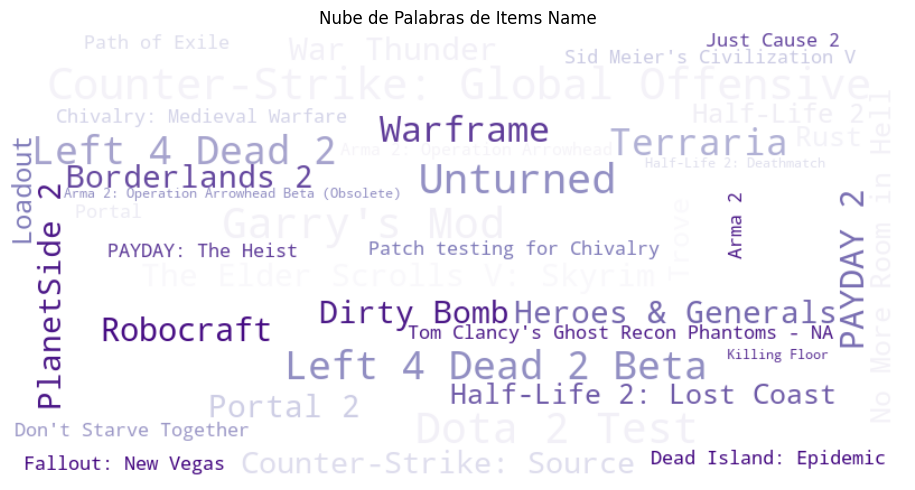

In [25]:
#Graficamos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Items Name')
plt.tight_layout()
plt.show()

In [26]:
users_items_df.to_csv("C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/user_items_exportado_limpio.csv")